#### Check http://qutip.org/docs/4.0.2/modules/qutip/floquet.html for these code.

<ipython-input-2-3a6448eb8c7c>:7: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  tlist  = linspace(0.0, 10 * T, 101)
<ipython-input-2-3a6448eb8c7c>:13: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  H = [H0, [H1, lambda t,args: sin(args['w'] * t)]]
<ipython-input-2-3a6448eb8c7c>:22: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  p_ex = zeros(len(tlist))


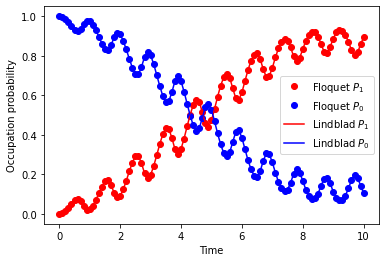

In [2]:
from qutip import *
from scipy import *

delta = 0.2 * 2*pi; eps0  = 1.0 * 2*pi
A     = 0.5 * 2*pi; omega = 1.0 * 2*pi
T      = (2*pi)/omega
tlist  = linspace(0.0, 10 * T, 101)
psi0   = basis(2,0)

H0 = - delta/2.0 * sigmax() - eps0/2.0 * sigmaz()
H1 = A/2.0 * sigmaz()
args = {'w': omega}
H = [H0, [H1, lambda t,args: sin(args['w'] * t)]]

# find the floquet modes for the time-dependent hamiltonian
f_modes_0,f_energies = floquet_modes(H, T, args)

# decompose the inital state in the floquet modes
f_coeff = floquet_state_decomposition(f_modes_0, f_energies, psi0)

# calculate the wavefunctions using the from the floquet modes
p_ex = zeros(len(tlist))
for n, t in enumerate(tlist):
    psi_t = floquet_wavefunction_t(f_modes_0, f_energies, f_coeff, t, H, T, args)
    p_ex[n] = expect(num(2), psi_t)

# For reference: calculate the same thing with mesolve
p_ex_ref = mesolve(H, psi0, tlist, [], [num(2)], args).expect[0]

# plot the results
from pylab import *
plot(tlist, real(p_ex),     'ro', tlist, 1-real(p_ex),     'bo')
plot(tlist, real(p_ex_ref), 'r',  tlist, 1-real(p_ex_ref), 'b')
xlabel('Time')
ylabel('Occupation probability')
legend(("Floquet $P_1$", "Floquet $P_0$", "Lindblad $P_1$", "Lindblad $P_0$"))
show()

## We have the Hamiltonian as---

$\mathcal{H} = \frac{1}{2} \Delta \sigma_x - \frac{1}{2} $$\epsilon$$_0 \sigma_z + \frac{1}{2} A Sin(\omega t) \sigma_z$ 

In [15]:
import numpy as np
from qutip import *
from scipy import *
from pylab import *

delta = 0.2 * 2*np.pi; eps0 = 1.0 * 2*np.pi; A = 2.5 * 2*np.pi; omega = 1.0 * 2*np.pi
H0 = - delta/2.0 * sigmax() - eps0/2.0 * sigmaz()
H1 = A/2.0 * sigmaz()
args = {'w': omega}
H = [H0, [H1, 'sin(w * t)']]
T = 2*pi / omega
f_modes_0, f_energies = floquet_modes(H, T, args)
f_energies

array([-2.83131212,  2.83131212])

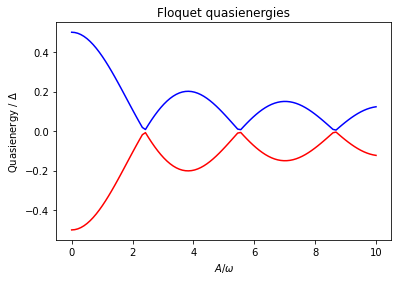

In [11]:
delta = 0.2 * 2*np.pi; eps0  = 0.0 * 2*np.pi
omega = 1.0 * 2*np.pi; A_vec = np.linspace(0, 10, 100) * omega;
T = (2*pi)/omega

tlist  = np.linspace(0.0, 10 * T, 101)
psi0   = basis(2,0)
q_energies = np.zeros((len(A_vec), 2))

H0 = delta/2.0 * sigmaz() - eps0/2.0 * sigmax()
args = {'w': omega}

for idx, A in enumerate(A_vec):
    H1 = A/2.0 * sigmax()
    #H = [H0, [H1, lambda t, w: sin(w*t)]]
    H = [H0, [H1, lambda t,args: sin(args['w'] * t)]]
    f_modes, f_energies = floquet_modes(H, T, args, True)
    q_energies[idx,:] = f_energies
    
figure()
plot(A_vec/omega, q_energies[:,0] / delta, 'b', A_vec/omega, q_energies[:,1] / delta, 'r')
xlabel(r'$A/\omega$')
ylabel(r'Quasienergy / $\Delta$')
title(r'Floquet quasienergies')
show()

In [12]:
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [14]:
N = 4
psi1 = basis(N,0)
print(psi1)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
